In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# /content/drive/MyDrive/energy_data.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/energy_data.csv")

# # EDA
# print(data.head())  # Display the first few rows of the dataset

# # Summary statistics
# print(data.describe())

# # Data visualization
# plt.figure(figsize=(10, 6))
# plt.plot(data['Year'], data['Access to electricity (% of population)'], label='Access to Electricity')
# plt.plot(data['Year'], data['Access to clean fuels for cooking'], label='Access to Clean Fuels')
# plt.xlabel('Year')
# plt.ylabel('Percentage')
# plt.title('Access to Electricity and Clean Fuels Over Time')
# plt.legend()
# plt.show()


In [ ]:
# Identify countries with low access to clean fuels
low_clean_fuels = data[data['Access to clean fuels for cooking'] < 50]
print(low_clean_fuels[['Entity', 'Access to clean fuels for cooking']])

# Identify countries with high carbon emissions
high_carbon_emissions = data[data['Value_co2_emissions_kt_by_country'] > 50000]
print(high_carbon_emissions[['Entity', 'Value_co2_emissions_kt_by_country']])


In [ ]:
# Task 3

In [ ]:
data.head()


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [ ]:
# Iterate over each column
for column in data.columns:
    # Check if the column contains numeric data
    if data[column].dtype in ['int64', 'float64']:  # Numeric data types
        # Check if the column contains NaN values
        if data[column].isnull().any():
            # Calculate the mean of the column
            column_mean = data[column].mean()
            # Fill NaN values in the column with the mean
            data[column].fillna(column_mean, inplace=True)

# Check if there are any NaN values left
print(data.isnull().any())

Entity                                                              False
Year                                                                False
Access to electricity (% of population)                             False
Access to clean fuels for cooking                                   False
Renewable-electricity-generating-capacity-per-capita                False
Financial flows to developing countries (US $)                      False
Renewable energy share in the total final energy consumption (%)    False
Electricity from fossil fuels (TWh)                                 False
Electricity from nuclear (TWh)                                      False
Electricity from renewables (TWh)                                   False
Low-carbon electricity (% electricity)                              False
Primary energy consumption per capita (kWh/person)                  False
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         False
Value_co2_emissions_kt_by_country     

In [ ]:
data.rename(columns={r"Density\n(P/Km2)": "Density"}, inplace=True)

# Remove non-numeric characters from the 'Density' column and convert it to numeric
data['Density'] = pd.to_numeric(data['Density'].str.replace(r'\D', ''), errors='coerce')

# Fill missing values in the 'Density' column with the mean of the column
data['Density'] = data['Density'].fillna(data['Density'].mean())

In [ ]:
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,11.986707,3.441610,13283.774348,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,11.986707,3.441610,13283.774348,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,11.986707,3.441610,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,11.986707,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,94224000.0,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,11.986707,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# # Select columns for feature scaling (excluding non-numeric and target columns)
# numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# # Scale the selected numeric columns
# data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# # Display the preprocessed dataset
# print(data.head())

In [ ]:
# Task 4: Model selection and training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Split the dataset into features and target variable
X = data.drop(columns=['Year', 'Entity', 'Value_co2_emissions_kt_by_country'])  # Features
y = data['Value_co2_emissions_kt_by_country']  # Target variable

In [ ]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Choose machine learning algorithms for regression tasks
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

In [ ]:
# Step 5: Train the selected models on the training data
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Step 6: Evaluate the performance of the trained models
results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R^2': r2}

In [ ]:
# Step 7: Choose the best performing model based on evaluation metrics
best_model = min(results, key=lambda x: results[x]['MSE'])
print("Best performing model:", best_model)
print("Performance metrics:")
for metric, value in results[best_model].items():
    print(f"{metric}: {value}")

Best performing model: Random Forest Regressor
Performance metrics:
MSE: 1354374770.05011
R^2: 0.995230970377198


In [ ]:
# Task 5: Model evaluation and visualization

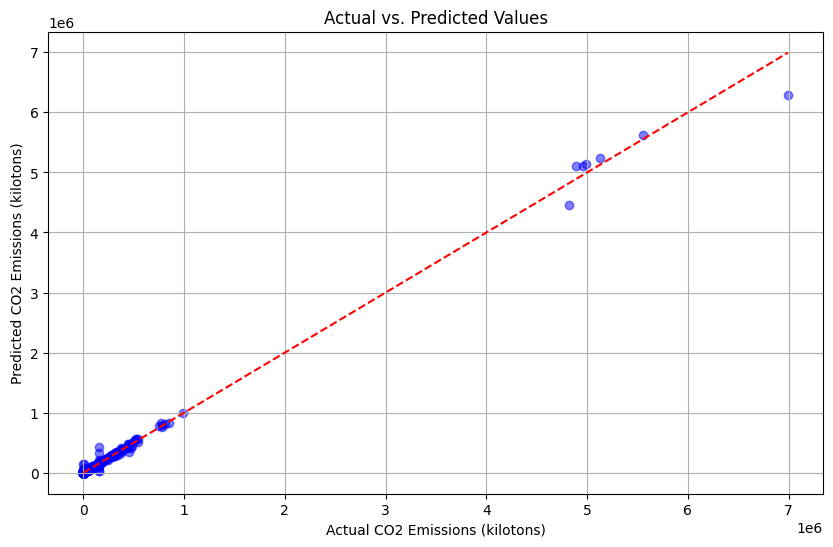

In [ ]:
# Step : Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual CO2 Emissions (kilotons)')
plt.ylabel('Predicted CO2 Emissions (kilotons)')
plt.grid(True)
plt.show()

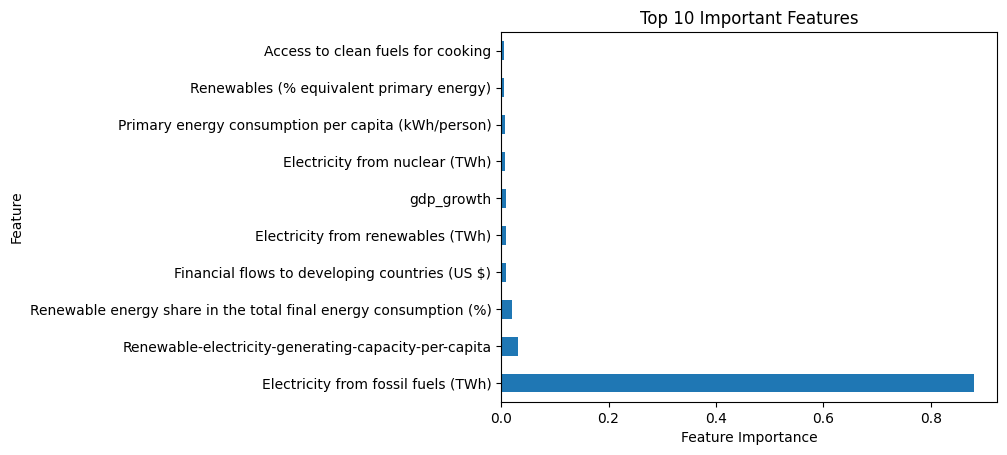

In [ ]:
# Step : Visualize feature importance
if isinstance(best_model, RandomForestRegressor):
    feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importance.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Important Features')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()